In [1]:
import sys
if 'google.colab' in sys.modules:
    !git clone  https://github.com/ecastillot/delaware.git ./delaware
    !pip install obspy

In [2]:
import sys
import os

version = "10102024"

if 'google.colab' in sys.modules:
    dw_path = os.path.join("/content/delaware",version)
else:
    dw_path = os.path.join("/home/emmanuel/ecastillo/dev/delaware",version)
    
sys.path.append(dw_path)

In [3]:
from delaware.core.read import EQPicks
from delaware.core.eqviewer import Stations
from delaware.loc.inv import prepare_cat2vps
import pandas as pd
import os
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

def plot_vij_histogram(vij_df, station,bins=20,output=None):
    """
    Plots a histogram of the v_ij values.

    Parameters:
        vij_df (pd.DataFrame): DataFrame containing v_ij values.
        bins (int): Number of bins for the histogram.
    """
    # Extract v_ij values
    v_ij_values = vij_df['v_ij']
    median = v_ij_values.quantile(0.5)
    
    # Plot the histogram using Seaborn
    plt.figure(figsize=(8, 5))
    sns.histplot(v_ij_values, bins=bins, kde=True, 
                #  stat="density",
                line_kws={'linewidth':2},
                 color='lightcoral', edgecolor='black')
    plt.axvline(x=median,color="black",linestyle='dashed')
    
    # Add the median value as text near the red line
    # plt.text(median-0.005, plt.gca().get_ylim()[1] * 0.5, f"median {median:.2f}", 
    #          color="black", fontsize=12, ha='center', va='center', 
    #          rotation=90)
    plt.text(0.95, 0.95, f"Median = {median:.2f}", 
             color="black", fontsize=12, ha='right', va='top', 
             transform=plt.gca().transAxes, 
            #  backgroundcolor="white"
             )
    
    # Add labels and title
    plt.title(f"{station}", fontsize=16)
    plt.xlabel(r"${v_p}/{v_s}$", fontsize=14)
    plt.ylabel("Counts", fontsize=14)
    
    # Show the plot
    plt.grid(alpha=0.3)
    if output is not None:
        plt.savefig(output, dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
root = "/home/emmanuel/ecastillo/dev/delaware/10102024/data/eq/aoi/growclust"
catalog_path = "/home/emmanuel/ecastillo/dev/delaware/10102024/data/eq/aoi/growclust/origin.csv"
picks_path = "/home/emmanuel/ecastillo/dev/delaware/10102024/data/eq/aoi/growclust/picks.db"
author = "growclust"
proj = "EPSG:3857"
stations_path = "/home/emmanuel/ecastillo/dev/delaware/10102024/data_git/stations/standard_stations.csv"


stations = pd.read_csv(stations_path)
stations_columns = ["network","station","latitude","longitude","elevation","x[km]","y[km]"]
stations = stations[stations_columns]
stations["station_index"] = stations.index
stations = Stations(data=stations,xy_epsg=proj)

print(stations.__str__(True))
print(stations.data.describe())

Station | 36 stations
	region: [-104.81, -103.82, 31.53, 31.9]
        latitude   longitude  elevation         x[km]        y[km]  \
count  36.000000   36.000000  36.000000     36.000000    36.000000   
mean   31.709941 -104.129801   1.011392 -11591.676408  3725.302217   
std     0.096624    0.238355   0.182699     26.533545    12.644006   
min    31.530513 -104.812040   0.760000 -11667.622922  3701.839715   
25%    31.652639 -104.274036   0.911500 -11607.732590  3717.799947   
50%    31.720069 -104.061070   0.976150 -11584.025268  3726.621101   
75%    31.760027 -103.948969   1.074500 -11571.546339  3731.851509   
max    31.902850 -103.824400   1.705000 -11557.679340  3750.564925   

       station_index      z[km]  
count      36.000000  36.000000  
mean       17.500000  -1.011392  
std        10.535654   0.182699  
min         0.000000  -1.705000  
25%         8.750000  -1.074500  
50%        17.500000  -0.976150  
75%        26.250000  -0.911500  
max        35.000000  -0.760000  


In [5]:
sta = "PB28"
single_station = stations.data[stations.data["station"]==sta]
single_station = single_station.iloc[0]

eqpicks = EQPicks(root,author=author,
                      xy_epsg=proj,
                      catalog_path=catalog_path,
                      picks_path=picks_path
                      )
src = (single_station.latitude,single_station.longitude,1,None)
cat,picks = eqpicks.get_catalog_with_picks(
                                        region_from_src=src
                                           )
cat,picks = prepare_cat2vps(cat.data,picks.data,stations.data)
picks = picks[picks["station"]==single_station.station]
cat = cat[cat['ev_id'].isin(picks['ev_id'])]

['texnet2017tjxk', 'texnet2018jmcn', 'texnet2018kvzw', 'texnet2018lxnk', 'texnet2018qhyp', 'texnet2018zbbj', 'texnet2019kefp', 'texnet2020dtqq', 'texnet2020oojy', 'texnet2020ucln', 'texnet2020wbgl', 'texnet2021bhvc', 'texnet2021bjcc', 'texnet2021bnjw', 'texnet2021brgs', 'texnet2021bzqz', 'texnet2021chbj', 'texnet2021coet', 'texnet2021cxhe', 'texnet2021dxbd', 'texnet2021dxbj', 'texnet2021dyhd', 'texnet2021fzqb', 'texnet2021gair', 'texnet2021ipvy', 'texnet2021iwto', 'texnet2021jbvw', 'texnet2021kamj', 'texnet2021kjej', 'texnet2021kjer', 'texnet2021klbb', 'texnet2021kwpm', 'texnet2021mxwz', 'texnet2021njdf', 'texnet2021qllt', 'texnet2021rtsx', 'texnet2021rwhf', 'texnet2021rwmw', 'texnet2021skmx', 'texnet2021sqao', 'texnet2021tqpa', 'texnet2021tsfi', 'texnet2021vfzy', 'texnet2021viul', 'texnet2021wpze', 'texnet2022bjdv', 'texnet2022bsbl', 'texnet2022bsrp', 'texnet2022cbwt', 'texnet2022ccfc', 'texnet2022cedz', 'texnet2022eeea', 'texnet2022ggky', 'texnet2022icbw', 'texnet2022lgeh', 'texnet20

/home/emmanuel/ecastillo/dev/delaware/10102024/delaware/core/database.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(all_dataframes, ignore_index=True)


In [6]:
picks_data = pd.merge(picks,cat,on=["ev_id"])
picks_data['arrival_time_P'] = pd.to_datetime(picks_data['arrival_time_P'])
picks_data['arrival_time_S'] = pd.to_datetime(picks_data['arrival_time_S'])
picks_data['origin_time'] = pd.to_datetime(picks_data['origin_time'])

picks_data['arrival_time_P'] = picks_data['arrival_time_P'] - picks_data['origin_time']
picks_data['arrival_time_S'] = picks_data['arrival_time_S'] - picks_data['origin_time']
picks_data['arrival_time_P'] = picks_data['arrival_time_P'].apply(lambda x: x.total_seconds())
picks_data['arrival_time_S'] = picks_data['arrival_time_S'].apply(lambda x: x.total_seconds())
picks_data

# List to store results
results = []

gd = []
bd = []
# Iterate over all combinations of row indices
for i, j in combinations(picks_data.index, 2):
    
    # Compute v_ij
    delta_t_S = picks_data.loc[i, 'arrival_time_S'] - picks_data.loc[j, 'arrival_time_S']
    delta_t_P = picks_data.loc[i, 'arrival_time_P'] - picks_data.loc[j, 'arrival_time_P']
    v_ij = delta_t_S / delta_t_P
    ev_i = picks_data.loc[i, 'ev_id']
    ev_j = picks_data.loc[j, 'ev_id']
    station = picks_data.loc[i, 'station']
    
    log = {"ev_i":ev_i,"ev_j":ev_j,
           "station":station,"v_ij":v_ij}
    
    if delta_t_P != 0:  # Avoid division by zero
        
        if v_ij > 0:
            results.append({
                'ev_i': ev_i,
                'ev_j': ev_j,
                'station': station,
                'v_ij': v_ij
            })
            gd.append(log)
        else:
            bd.append(log)
    else:
        bd.append(log)
        
print(f"Good: {len(gd)}, Bad:{len(bd)}")
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

Good: 1464, Bad:366


,ev_i,ev_j,station,v_ij
0,texnet2021dxbd,texnet2021dyhd,PB28,3.475935
1,texnet2021dxbd,texnet2021fzqb,PB28,0.914167
2,texnet2021dxbd,texnet2021ipvy,PB28,2.107120
3,texnet2021dxbd,texnet2021iwto,PB28,0.241524
4,texnet2021dxbd,texnet2021kjer,PB28,3.116109
...,...,...,...,...
1459,texnet2024akzc,texnet2024eljv,PB28,1.702821
1460,texnet2024akzc,texnet2024fxgw,PB28,1.847180
1461,texnet2024alrw,texnet2024eljv,PB28,0.950308
1462,texnet2024alrw,texnet2024fxgw,PB28,1.123206


              v_ij
count  1170.000000
mean      2.060476
std       1.172795
min       0.528067
25%       1.209585
50%       1.757616
75%       2.580771
max       5.922499


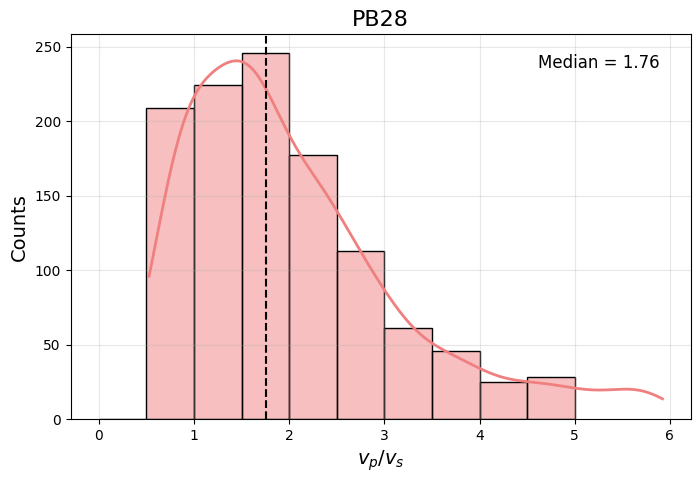

In [8]:
import numpy as np
bins = np.arange(0, 5.5, 0.5)

output = os.path.join(f"/home/emmanuel/ecastillo/dev/delaware/10102024/figures/vps_station/vps_{sta}.png")
# results_df.to_csv(output,index=False)
Q1 = results_df['v_ij'].quantile(0.10)
Q3 = results_df['v_ij'].quantile(0.90)
iqr_results_df = results_df[(results_df['v_ij'] >= Q1) & (results_df['v_ij'] <= Q3)]
print(iqr_results_df.describe())
plot_vij_histogram(iqr_results_df,sta,bins=bins,output=output)